Observations:

1) Country VS Points

	- Even with the US giving the most votes, Germany has the highest ranked wine at an average of 90.0.
	- When averaging out all the wine, the mode doesn't fall far from the top and bottom of the list. Most wines scored around an 88 that were not top or bottom.
    - The worst ranked wine only falls at 83.0 points in Brazil, which overall isn't very low. The worst wines in the world aren't even ranked. Only the best, so let's say Brazil is the worst best wine?

2) Country VS Price

    - Surprisingly, Canada has the highest priced wine at $80.00 and didn't fall that far behind the highest ranked Germany(90.0) in points with 89.5.
    - The countries that are most popular for producing wine(US, Italy, Germany) have about the same average pricing 
    - That also means that the wines might be harder to come by causing an inflated price by the imported country.
    - Keep in mind that the dataset includes all variables of wine, not the 8 most popular. 
    
OVERALL, the randomizing of the data doesn't allow a good look at how the origin of a wine can affect the popularity and price. 

In [7]:
% matplotlib notebook

In [8]:
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
wine_data = pd.read_csv("Resources/sample_data.csv")

wine_data.head()

,Unnamed: 0,Unnamed: 0.1,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,26038,26038,Spain,"Raw, gamy aromas of herbal black fruits and we...",Finca Resalso,84,15.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Emilio Moro 2015 Finca Resalso (Ribera del Du...,Tempranillo,Emilio Moro
1,115439,115439,US,This wine is mild in acidity and simple in str...,NaN,87,24.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Rutherford Ranch 2015 Chardonnay (Napa Valley),Chardonnay,Rutherford Ranch
2,111361,111361,Austria,"This is described as Brut dry, but the perfume...",Sparkling Mosi Brut,85,NaN,Österreichischer Sekt,NaN,NaN,Roger Voss,@vossroger,Hermann Moser NV Sparkling Mosi Brut Gelber Mu...,Gelber Muskateller,Hermann Moser
3,109611,109611,France,"This big, ripe wine is opulent and smooth. Wit...",Tradition,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Tradition Pinot Gris (Al...,Pinot Gris,Domaine Schoffit
4,33921,33921,US,The wine has tempting aromas like marzipan and...,NaN,86,12.0,California,California,California Other,Jim Gordon,@gordone_cellars,Leese-Fitch 2014 Chardonnay (California),Chardonnay,Leese-Fitch


In [9]:
# Clean Dataframe
countries_df = wine_data.loc[:, ["country", "points", "price"]]
countries_df = countries_df.groupby(["country"]).mean()
points= countries_df["points"].astype(float).map("{:,.2f}".format)
price = countries_df["price"].astype(float).map("${:,.2f}".format)
countries_df


,points,price
country,,
Argentina,86.521739,23.227273
Australia,87.857143,39.857143
Austria,89.700000,28.960000
Brazil,83.000000,28.000000
Canada,89.500000,80.000000
Chile,85.631579,18.263158
Croatia,84.000000,13.000000
France,88.824859,38.871622
Germany,90.214286,43.071429


<IPython.core.display.Javascript object>


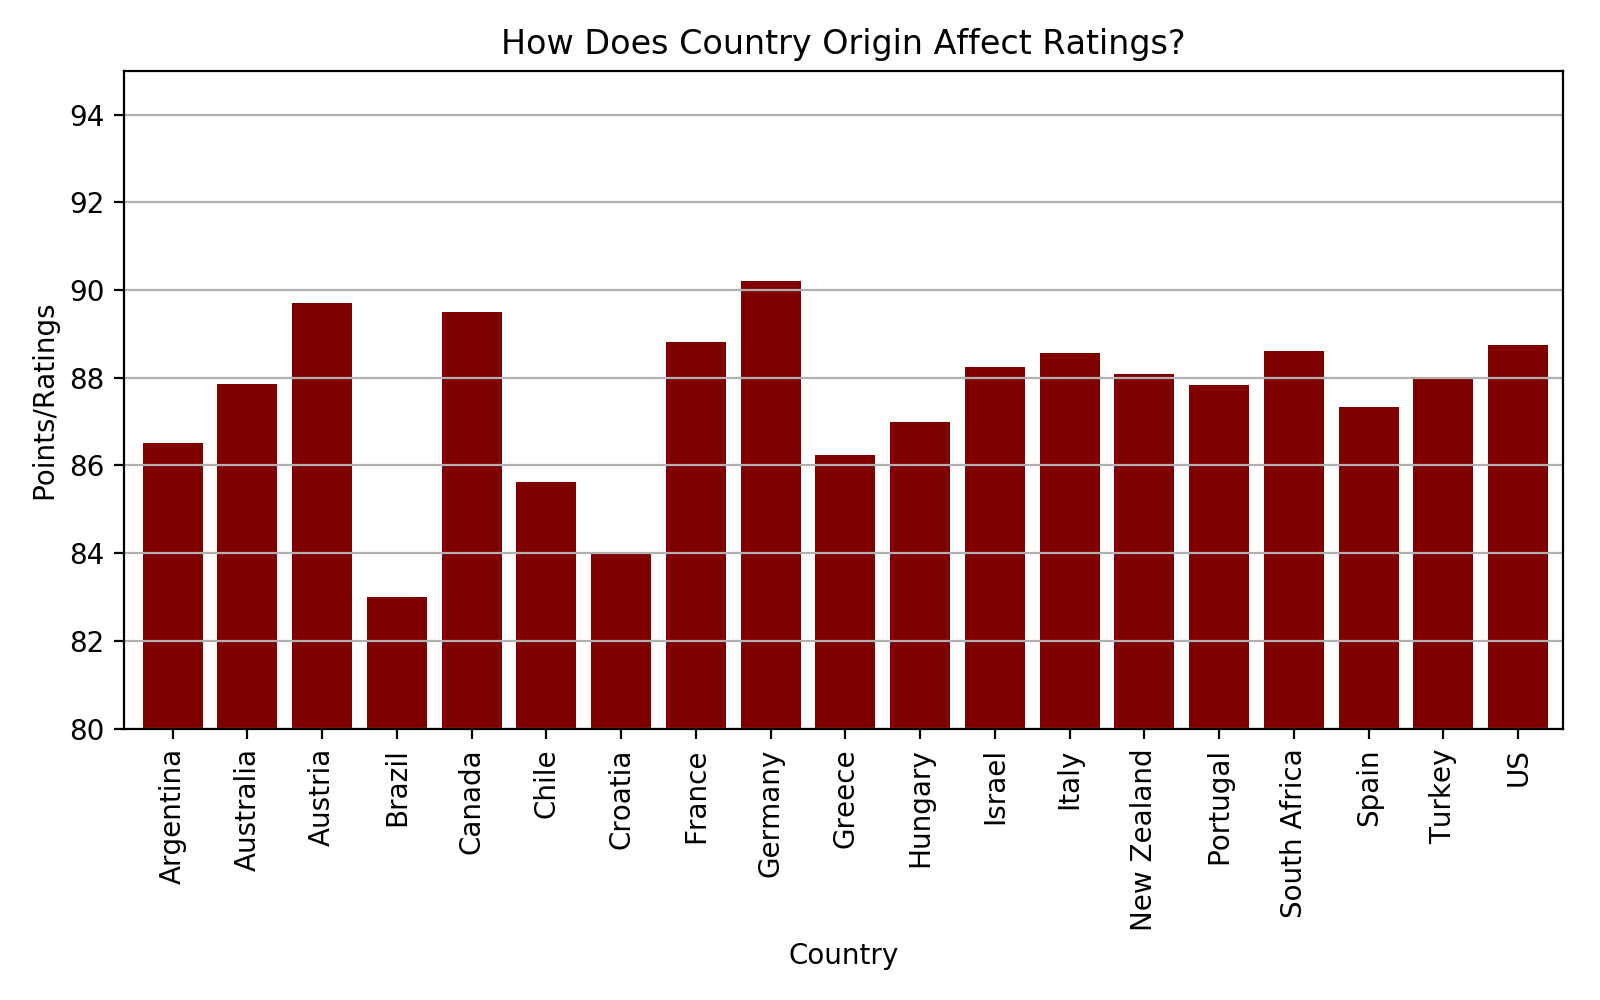

In [10]:
# Does the country of wine affect popularity? (2 Graphs)

#Country vs Points
countries = countries_df.index.values
points = countries_df["points"]

#Plot Graph
x_axis = np.arange(len(countries_df))
plt.figure(figsize=(8,5))

plt.bar(x_axis, points, color="maroon", align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, countries, rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim((80, 95))

plt.title("How Does Country Origin Affect Ratings?")
plt.xlabel("Country")
plt.ylabel("Points/Ratings")

plt.grid(axis="y")
plt.show()
plt.tight_layout()
plt.savefig("Images/CountryVsRatings")

<IPython.core.display.Javascript object>


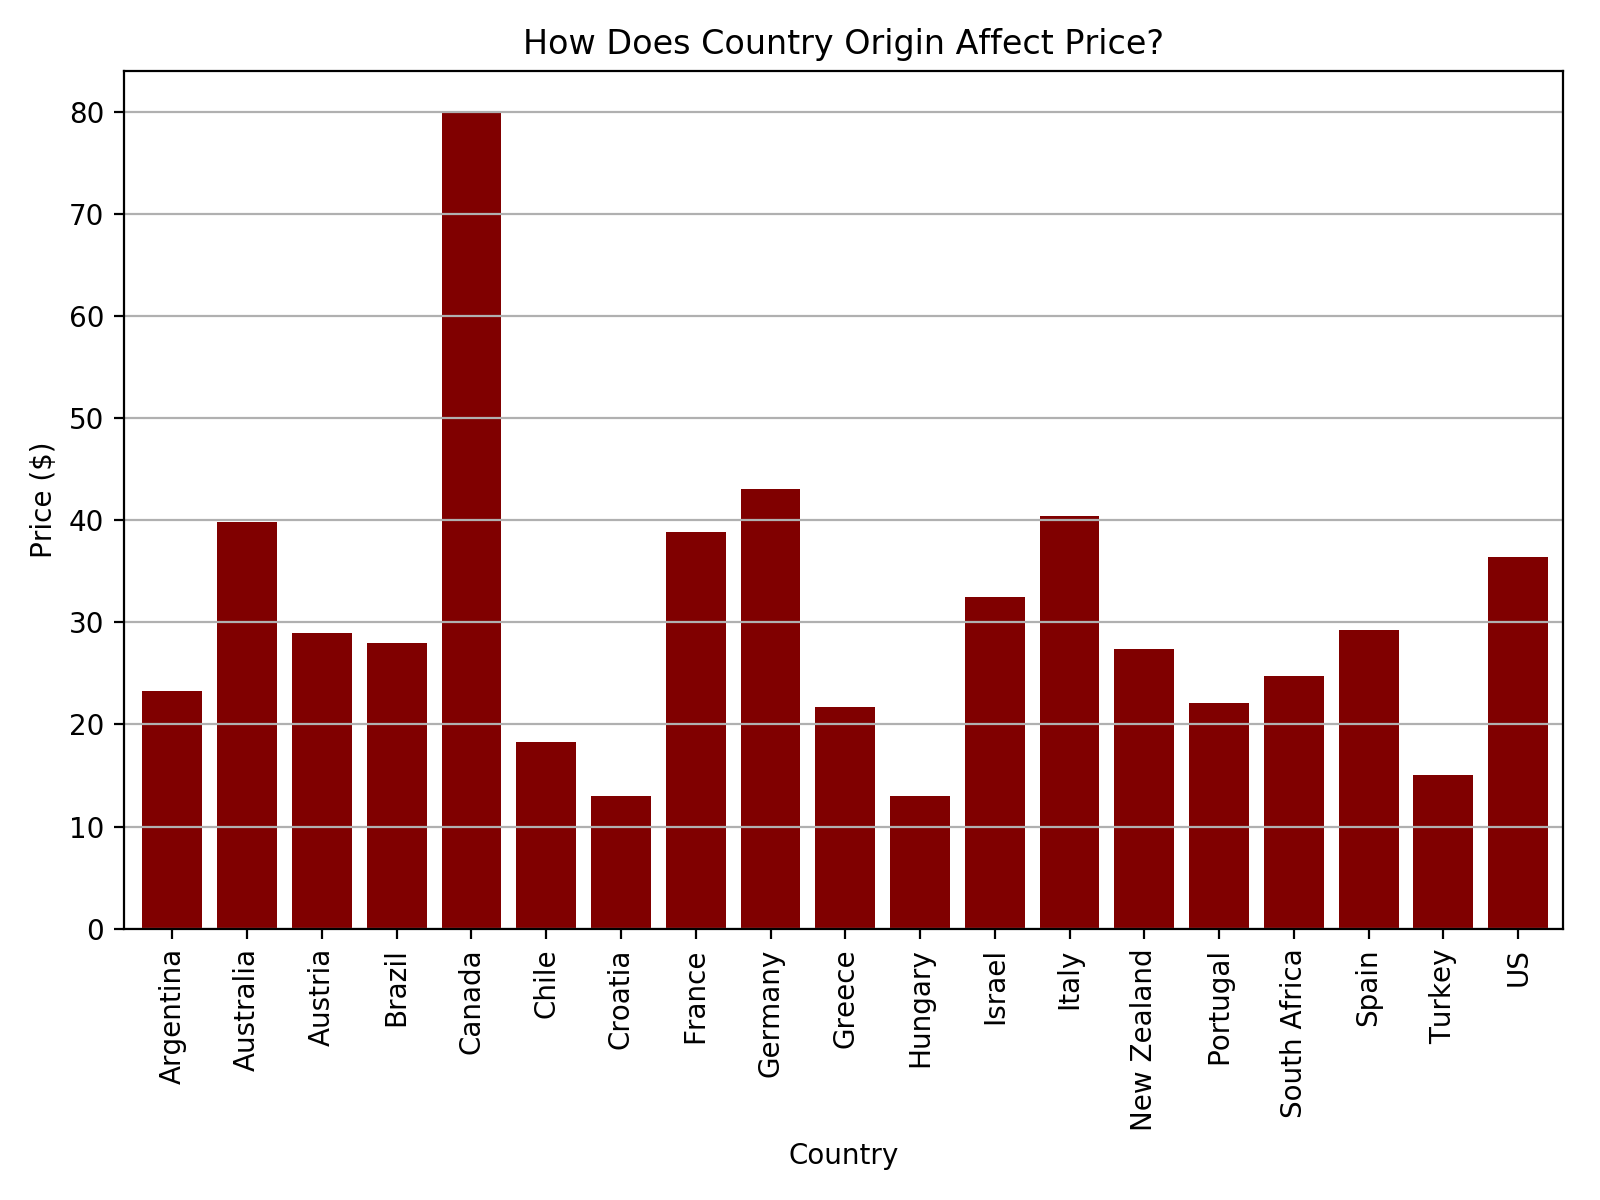

In [11]:
# Does the origin of the wine correlate with the price of wine?

#Country vs Price
countries = countries_df.index.values
price = countries_df["price"]

x_axis = np.arange(len(countries_df))
plt.figure(figsize=(8, 6))

plt.bar(x_axis, price, color="maroon", align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, countries, rotation="vertical")

plt.xlim(-0.25, len(x_axis))

plt.title("How Does Country Origin Affect Price?")
plt.xlabel("Country")
plt.ylabel("Price ($)")

plt.grid(axis="y")
plt.show()
plt.tight_layout()
plt.savefig("Images/CountryVsPrice.png")